In [7]:
# load libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#Collaborating Google colab with drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Loading the Train.csv file of Titanic
D1=pd.read_csv('/content/drive/MyDrive/data analytics/column_2C_weka.csv')
D1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [8]:
D1.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [9]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [10]:
D1.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


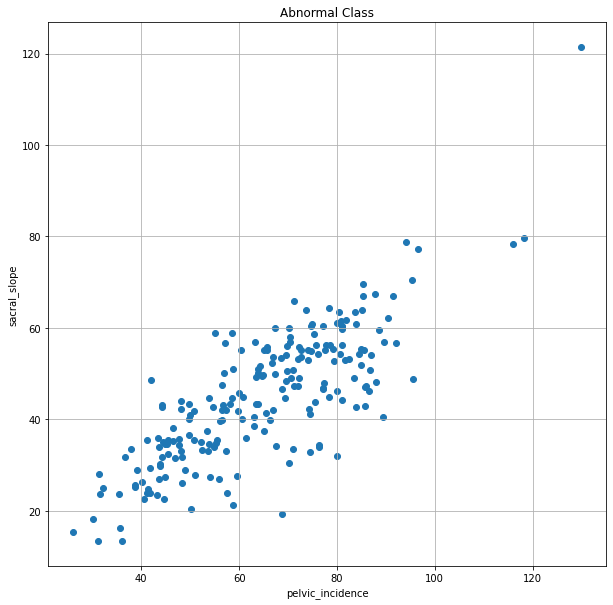

In [12]:
data1 = D1[D1['class'] =='Abnormal']
x=data1["pelvic_incidence"].values.reshape(-1,1)
y=data1["sacral_slope"].values.reshape(-1,1)

#plot
plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.title("Abnormal Class")
plt.grid()
plt.show()

R_square score:  0.6458410481075871
R_2 score with sklearn.metrics library:  0.6458410481075871


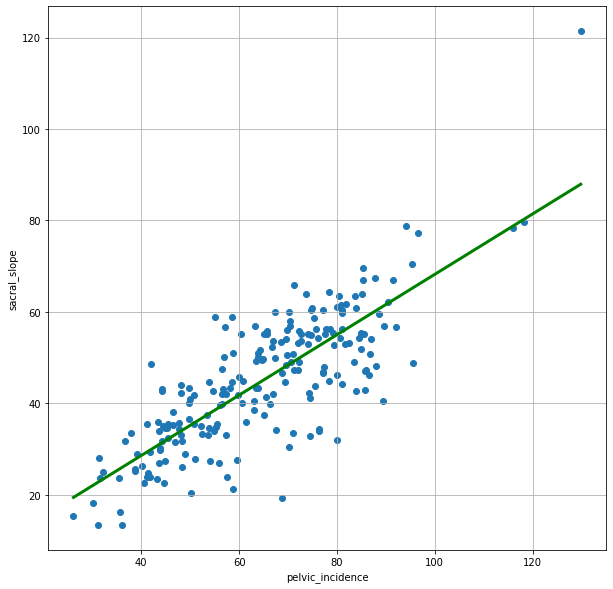

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#regression
linear_reg=LinearRegression()

#fit
linear_reg.fit(x,y)

#prediction
# we need these values to plot the regression line.
x_=np.linspace(min(x), max(x)).reshape(-1,1) # 
y_head=linear_reg.predict(x_)

#R2 score with LinearRegression library
print("R_square score: ",linear_reg.score(x,y))
# R2 score with sklearn.metrics
print("R_2 score with sklearn.metrics library: ",r2_score(y,linear_reg.predict(x)))

# Plot regression line and scatter
plt.subplots(figsize=(10,10))
plt.plot(x_, y_head, color='green', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.grid()
plt.show()